In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tree plotting
#import pydot, graphviz 
from IPython.display import Image 
#from sklearn.externals.six import StringIO  
from io import StringIO  

# Model selection
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

%matplotlib inline
plt.style.use('seaborn-white')

In [43]:
df = pd.read_csv(r"C:\Users\shipa\OneDrive\Desktop\STAT 724\data\OJ.csv")

In [89]:
#df.head()

In [10]:
df.Purchase.unique()

array(['CH', 'MM'], dtype=object)

In [19]:
df['STORE'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [44]:
#One Hot Encode cat variables
df1 = pd.concat([df, pd.get_dummies(df['STORE'], drop_first=True, prefix="Store")], axis=1)

In [45]:
df1 = df1.drop(['Unnamed: 0', 'STORE'], axis=1)

In [87]:
#df1.head()

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [51]:
#Purchase_cat = 0, represents CH, and Purchase_cat = 1, represents MM
df1['Purchase_cat'] = labelencoder.fit_transform(df1['Purchase'])

In [86]:
#df1.head()

In [54]:
#Labelencode Store7
labelencoder1 = LabelEncoder()
df1['Store_7'] = labelencoder1.fit_transform(df1['Store7'])

In [56]:
df1 = df1.drop(['Purchase', 'Store7'], axis=1)

In [88]:
#df1.head()

In [58]:
df1['StoreID'].unique()

array([1, 7, 2, 3, 4], dtype=int64)

In [63]:
df[['StoreID', 'STORE']][df['StoreID']==3].head(5)

,StoreID,STORE
34,3,3
35,3,3
89,3,3
111,3,3
115,3,3


In [65]:
df1 = df1.drop('StoreID', axis=1)

In [69]:
X = df1.drop('Purchase_cat', axis=1)
y = df1['Purchase_cat']

In [70]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [15]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor \
     , RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

In [71]:
X.shape, X_train.shape

((1070, 19), (321, 19))

In [76]:
X_test.shape

(749, 19)

In [78]:
y_test

120    0
374    1
90     0
844    1
649    0
      ..
150    1
37     0
556    1
921    0
908    0
Name: Purchase_cat, Length: 749, dtype: int32

### Bagging: using all features

In [75]:
classifier1 = RandomForestClassifier(max_features=19, random_state=10)
classifier1.fit(X_train, y_train)

RandomForestClassifier(max_features=19, random_state=10)

In [77]:
# Confusion matrix

def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
    print('Total Positive (Actual): ', np.sum(cm[1]))
    print('Accuracy: ', ((cm[1][1])+(cm[0][0]))/749)

True Negatives:  376
False Positives:  74
False Negatives:  102
True Positives:  197
Total Positive (Actual):  299
Accuracy:  0.7650200267022697


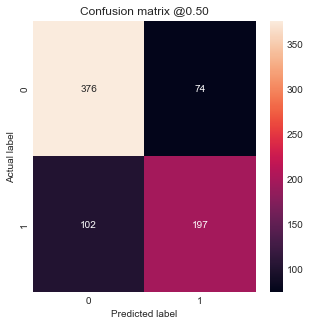

In [79]:
plot_cm(y_test, classifier1.predict(X_test))

### Random forests: using 8 features

In [80]:
classifier2 = RandomForestClassifier(max_features=8, random_state=11)
classifier2.fit(X_train, y_train)

RandomForestClassifier(max_features=8, random_state=11)

True Negatives:  380
False Positives:  70
False Negatives:  99
True Positives:  200
Total Positive (Actual):  299
Accuracy:  0.774365821094793


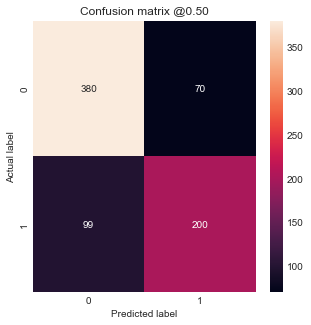

In [81]:
plot_cm(y_test, classifier2.predict(X_test))

### Boosting

In [82]:
classifier3 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=1, max_depth=3)
classifier3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=1)

True Negatives:  388
False Positives:  62
False Negatives:  85
True Positives:  214
Total Positive (Actual):  299
Accuracy:  0.8037383177570093


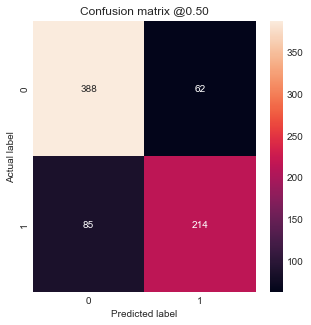

In [83]:
plot_cm(y_test, classifier3.predict(X_test))

### Single Tree Classifier

In [84]:
classifier4 = DecisionTreeClassifier()
classifier4.fit(X_train, y_train)

DecisionTreeClassifier()

True Negatives:  363
False Positives:  87
False Negatives:  103
True Positives:  196
Total Positive (Actual):  299
Accuracy:  0.7463284379172229


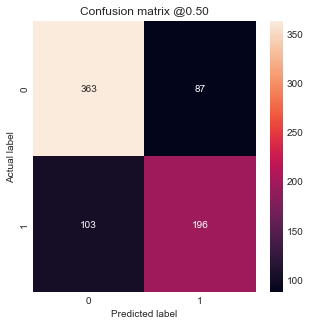

In [85]:
plot_cm(y_test, classifier4.predict(X_test))

The order from best to worst of these 4 fitted models are:

    1. Boosting has an accuracy of 0.8037383177570093.
    2. Random Forest with 8 features has an accuracy of 0.774365821094793.
    3. Bagging all 19 features with an accuracy of 0.7650200267022697.
    4. Single Decision Tree with an accuracy of 0.7463284379172229.